In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing The Dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import IPython.display as ipd
from librosa.display import waveshow
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [3]:
# initiating directory path
CREME = '/content/drive/MyDrive/Kaggle_datasets/CREMA-D/AudioWAV'
rav = '/content/drive/MyDrive/Kaggle_datasets/RAVDESS Emotional speech audio/audio_speech_actors_01-24'
TESS = '/content/drive/MyDrive/Kaggle_datasets/TorontoEmotionalSpeechSet/TESSTorontoEmotionalSpeechSetData'

In [4]:
import os

# loading CREME data, create list of emtions and path for audio files
emotion = []
path = []

# for loop to loop through directory
for i in os.listdir(CREME):
    if i.split('_')[-2] == 'FEA' :
        emotion.append('fear')
        path.append(CREME +'/'+ i)
    elif i.split('_')[-2] == 'ANG' :
        emotion.append('angry')
        path.append(CREME +'/'+ i)
    elif i.split('_')[-2] == 'DIS' :
        emotion.append('disgust')
        path.append(CREME +'/'+ i)
    elif i.split('_')[-2] == 'HAP' :
        emotion.append('happy')
        path.append(CREME +'/'+ i)
    elif i.split('_')[-2] == 'NEU' :
        emotion.append('neutral')
        path.append(CREME +'/'+ i)
    elif i.split('_')[-2] == 'SAD' :
        emotion.append('sad')
        path.append(CREME +'/'+ i)

# convertig it into dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
creme_df = pd.concat([emotion_df,path_df],axis = 1)

In [5]:
creme_df.head()

,emotion,path
0,sad,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
1,fear,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
2,disgust,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
3,happy,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
4,happy,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...


In [6]:
# loading ravdess data

emotion = []
path = []

for i in os.listdir(rav) :
    # 20 actors in directory
    for aud in os.listdir(rav + '/' +i) :
        split = aud.split('.')[0].split('-')
        temp = int(split[2])

        if split[2] == '01' :
            emotion.append('neutral')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '02' :
            emotion.append('calm')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '03' :
            emotion.append('happy')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '04' :
            emotion.append('sad')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '05' :
            emotion.append('angry')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '06' :
            emotion.append('fear')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '07' :
            emotion.append('disgust')
            path.append(rav +'/'+ i +'/' + aud)
        if split[2] == '08' :
            emotion.append('suprised')
            path.append(rav +'/'+ i +'/' + aud)
# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
rav_df = pd.concat([emotion_df,path_df],axis = 1)

In [7]:
rav_df.head()

,emotion,path
0,neutral,/content/drive/MyDrive/Kaggle_datasets/RAVDESS...
1,neutral,/content/drive/MyDrive/Kaggle_datasets/RAVDESS...
2,neutral,/content/drive/MyDrive/Kaggle_datasets/RAVDESS...
3,calm,/content/drive/MyDrive/Kaggle_datasets/RAVDESS...
4,calm,/content/drive/MyDrive/Kaggle_datasets/RAVDESS...


In [8]:
# loading tess data

emotion = []
path = []

for i in os.listdir(TESS) :
  fname = os.listdir(TESS +'/'+ i)
  for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS +'/'+ i + '/' + f)
        if i == 'OAF_disgust' or i == 'YAF_disgust' :
            emotion.append('disgust')
            path.append(TESS +'/'+ i + '/' + f)
        if i == 'OAF_Fear' or i == 'YAF_fear' :
            emotion.append('fear')
            path.append(TESS + '/'+i + '/' + f)
        if i == 'OAF_happy' or i == 'YAF_happy' :
            emotion.append('happy')
            path.append(TESS + '/'+i + '/' + f)
        if i == 'OAF_neutral' or i == 'YAF_neutral' :
            emotion.append('neutral')
            path.append(TESS +'/'+ i + '/' + f)
        if i == 'OAF_pleasant_surprise' or i == 'YAF_surprise' :
            emotion.append('surprise')
            path.append(TESS +'/'+ i + '/' + f)
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS +'/'+ i + '/' + f)
        if i == 'OAF_Sad' or i == 'YAF_sad' :
            emotion.append('sad')
            path.append(TESS +'/'+ i + '/' + f)

# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
tess_df = pd.concat([emotion_df,path_df],axis = 1)
tess_df.head()

,emotion,path
0,sad,/content/drive/MyDrive/Kaggle_datasets/Toronto...
1,sad,/content/drive/MyDrive/Kaggle_datasets/Toronto...
2,sad,/content/drive/MyDrive/Kaggle_datasets/Toronto...
3,sad,/content/drive/MyDrive/Kaggle_datasets/Toronto...
4,sad,/content/drive/MyDrive/Kaggle_datasets/Toronto...


In [9]:
tess_df.iloc[0,1]

'/content/drive/MyDrive/Kaggle_datasets/TorontoEmotionalSpeechSet/TESSTorontoEmotionalSpeechSetData/OAF_Sad/OAF_back_sad.wav'

In [10]:
# combining all dataframe

audio_df  = pd.concat([
    creme_df,rav_df,tess_df
],axis = 0)

audio_df.reset_index(drop = 'index',inplace = True)

In [11]:
audio_df

,emotion,path
0,sad,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
1,fear,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
2,disgust,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
3,happy,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
4,happy,/content/drive/MyDrive/Kaggle_datasets/CREMA-D...
...,...,...
5165,angry,/content/drive/MyDrive/Kaggle_datasets/Toronto...
5166,angry,/content/drive/MyDrive/Kaggle_datasets/Toronto...
5167,angry,/content/drive/MyDrive/Kaggle_datasets/Toronto...
5168,angry,/content/drive/MyDrive/Kaggle_datasets/Toronto...


In [12]:
# saving audio_csv
audio_df.to_csv('audio.csv')

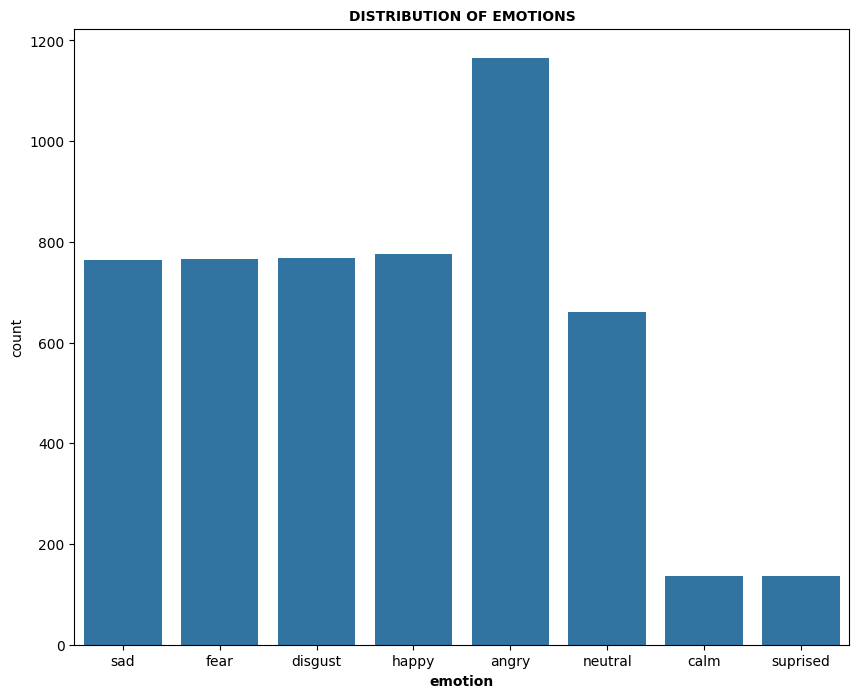

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(data = audio_df,x= 'emotion')
plt.title('DISTRIBUTION OF EMOTIONS',fontweight = 'bold',fontsize = 10)
plt.xlabel('emotion',fontweight = 'bold');

In [14]:
def audio_visual(path,emotion) :
    data , sample_rate = librosa.load(path)
    plt.figure(figsize = (10,5))
    plt.title(f'Waveplot for audion with {emotion} emotions')
    waveshow(data,sample_rate)
    plt.show()

    return ipd.Audio(path)

In [15]:
def feature_extraction(file) :
  mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 40)
  mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
  return mfcc_scaled_feature

  # NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(a=data, shift=shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)
#higher speed
def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(y=data, rate=speed_factor)
# lower speed
def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(y=data, rate=speed_factor)


In [16]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

In [17]:
audio_df.path[0]


'/content/drive/MyDrive/Kaggle_datasets/CREMA-D/AudioWAV/1006_TAI_SAD_XX.wav'

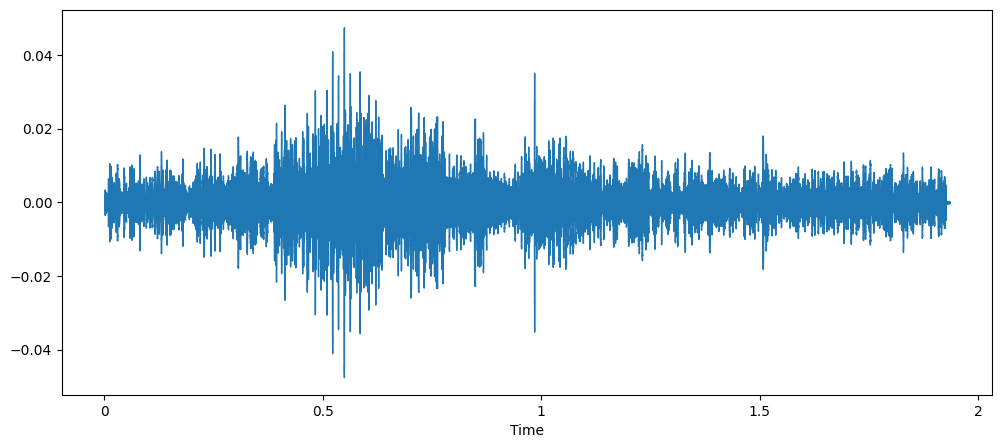

In [18]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)


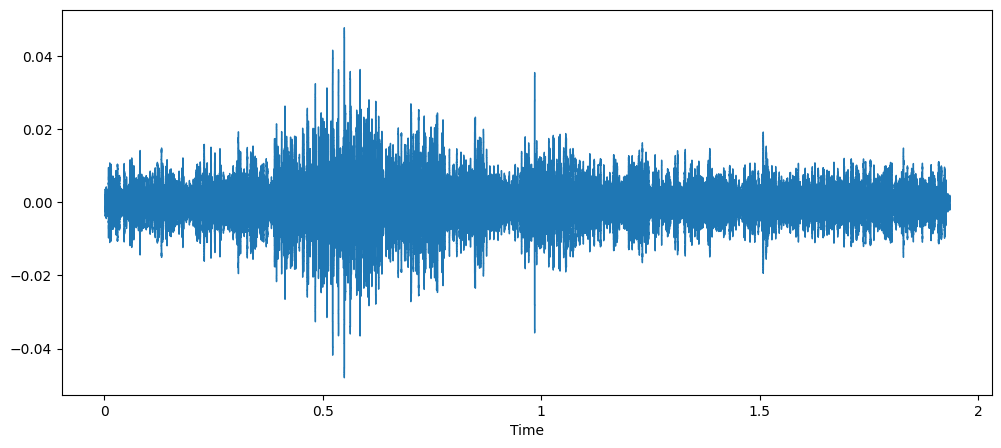

In [19]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

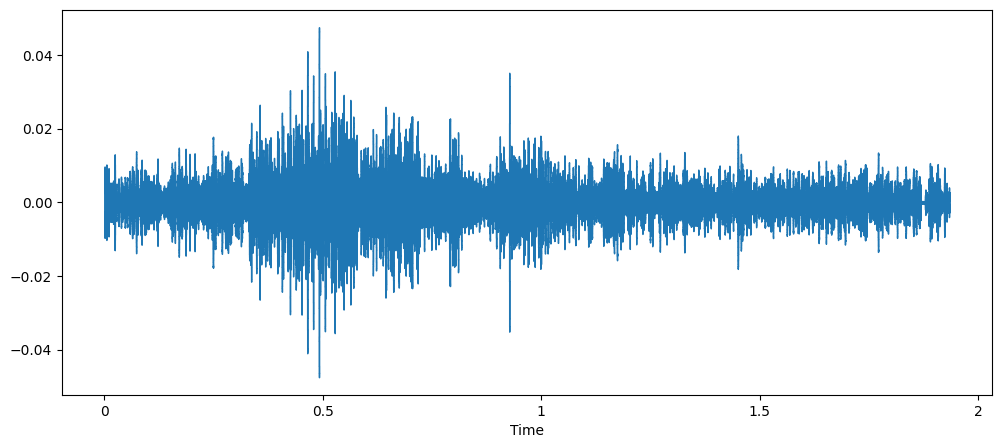

In [20]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

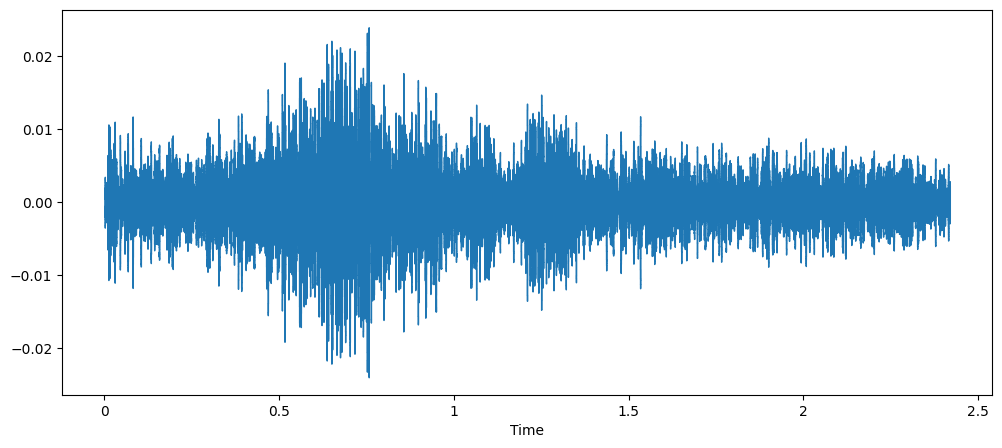

In [21]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [22]:
data

array([-3.3394346e-04, -6.3595118e-04, -4.7366624e-04, ...,
        1.2270435e-04,  8.1493570e-05,  0.0000000e+00], dtype=float32)

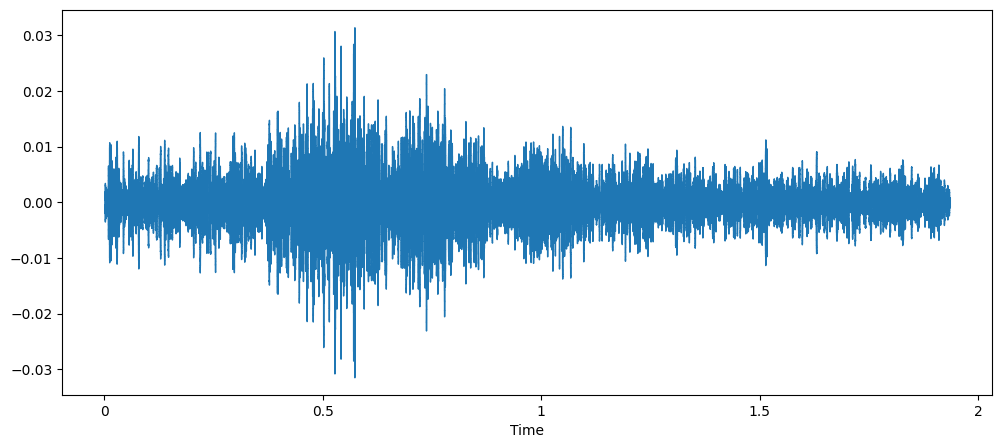

In [23]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

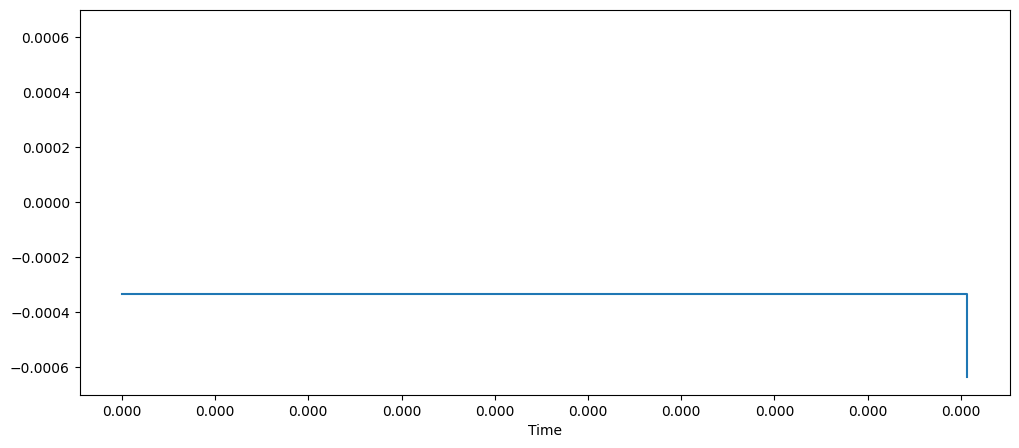

In [24]:
# AUDIO WITH high speed
x = higher_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

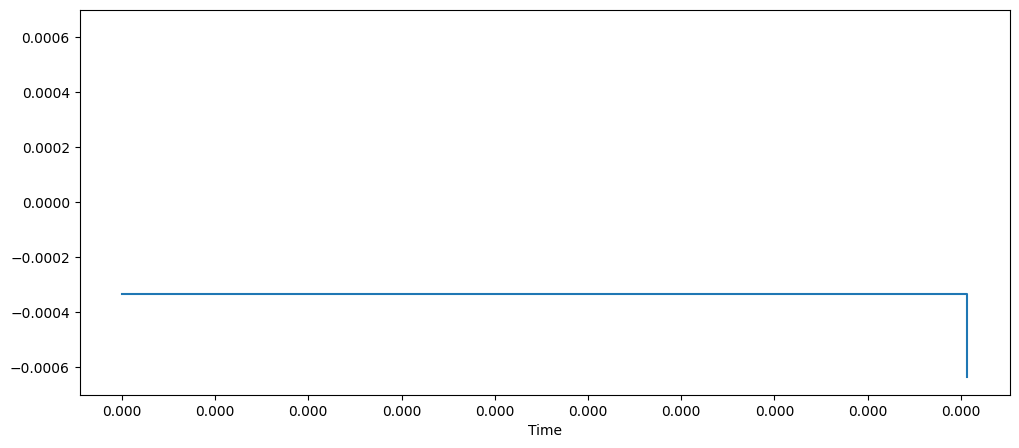

In [25]:
x = lower_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [26]:
def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feature_extraction(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feature_extraction(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extraction(data_stretch_pitch)
    result = np.vstack((result, res3))
    # data with high speed
    high_speed = higher_speed(data)
    res4 = feature_extraction(high_speed)
    result = np.vstack((result,res4))
     # data with low speed
    low_speed = lower_speed(data)
    res5 = feature_extraction(high_speed)
    result = np.vstack((result,res5))
    return result

In [27]:
from tqdm import tqdm
x = []
y = []

for path,emotion in tqdm(zip(audio_df['path'],audio_df['emotion'])) :
   feature = get_feat(path)
   for ele in feature :
     x.append(ele)
     y.append(emotion)

5170it [36:40,  2.35it/s]


In [28]:
Emotions = pd.DataFrame(x)
Emotions['labels'] = y
Emotions.to_csv('/content/drive/MyDrive/SPEECH EMOTION REGCONITION/emotion.csv', index=False)

In [29]:
Emotions= pd.read_csv('/content/drive/MyDrive/SPEECH EMOTION REGCONITION/emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-429.301880,138.093689,12.359603,66.641846,-21.215841,26.068295,-20.639458,13.854490,-12.364152,5.450428,...,0.731685,4.794444,-1.538127,3.633511,-1.685217,3.026978,-1.746816,4.194920,0.525308,sad
1,-369.076499,80.579625,42.497874,33.334772,8.971790,4.258209,-3.061181,0.408915,-3.114064,-0.297356,...,0.474182,2.531194,1.028168,1.195254,1.071463,0.654647,0.801790,1.897861,1.566895,sad
2,-494.192932,130.992615,17.355505,57.634281,-20.700958,24.379028,-20.369310,14.412664,-13.881358,7.908128,...,7.168661,1.199526,0.970370,1.637384,1.474521,1.976728,0.147485,3.535304,-1.644660,sad
3,-464.820190,139.803864,9.313372,67.316628,-22.780104,27.141413,-22.381947,14.725032,-13.665572,4.997799,...,1.463877,5.399442,-1.148300,4.628995,-0.901754,3.577780,-1.345931,4.757071,0.691859,sad
4,-464.820190,139.803864,9.313372,67.316628,-22.780104,27.141413,-22.381947,14.725032,-13.665572,4.997799,...,1.463877,5.399442,-1.148300,4.628995,-0.901754,3.577780,-1.345931,4.757071,0.691859,sad


In [30]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [31]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((20680, 40), (20680, 8), (5170, 40), (5170, 8))

In [33]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((20680, 40), (20680, 8), (5170, 40), (5170, 8))

In [34]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = clf.predict(x_test)

In [36]:
print(f'the training score for decision tree is {clf.score(x_train,y_train)}')

the training score for decision tree is 0.9996131528046421


In [37]:
print(f'the test score for decision tree is {clf.score(x_test,y_test)}')

the test score for decision tree is 0.8071566731141199


In [38]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [ ]:
print(f"Training set score: {(clf2.score(x_train, y_train))}")
print(f"Test set score: {(clf2.score(x_test, y_test))}")

Training set score: 0.9964700193423598
Test set score: 0.8796905222437137


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((20680, 40, 1), (20680, 8), (5170, 40, 1), (5170, 8))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,)

In [ ]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))

my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=8, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           2048      
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 256)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 20, 256)           1024      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 10, 128)           0         
 g1D)                                                            
                                                        

In [ ]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test),callbacks = early_stopping)

Epoch 1/50
647/647 [==============================] - 31s 41ms/step - loss: 1.1721 - accuracy: 0.5786 - val_loss: 0.8588 - val_accuracy: 0.6627
Epoch 2/50
647/647 [==============================] - 26s 41ms/step - loss: 0.8851 - accuracy: 0.6636 - val_loss: 0.7483 - val_accuracy: 0.7091
Epoch 3/50
647/647 [==============================] - 27s 42ms/step - loss: 0.8110 - accuracy: 0.6884 - val_loss: 0.6904 - val_accuracy: 0.7217
Epoch 4/50
647/647 [==============================] - 26s 41ms/step - loss: 0.7434 - accuracy: 0.7162 - val_loss: 0.6664 - val_accuracy: 0.7509
Epoch 5/50
647/647 [==============================] - 26s 40ms/step - loss: 0.7004 - accuracy: 0.7319 - val_loss: 0.6011 - val_accuracy: 0.7679
Epoch 6/50
647/647 [==============================] - 26s 40ms/step - loss: 0.6475 - accuracy: 0.7502 - val_loss: 0.5774 - val_accuracy: 0.7826
Epoch 7/50
647/647 [==============================] - 26s 40ms/step - loss: 0.5985 - accuracy: 0.7750 - val_loss: 0.5345 - val_accuracy:

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [ ]:
df

,Predicted Labels,Actual Labels
0,fear,fear
1,angry,angry
2,happy,happy
3,fear,fear
4,fear,fear
...,...,...
5165,neutral,neutral
5166,neutral,neutral
5167,neutral,neutral
5168,disgust,disgust


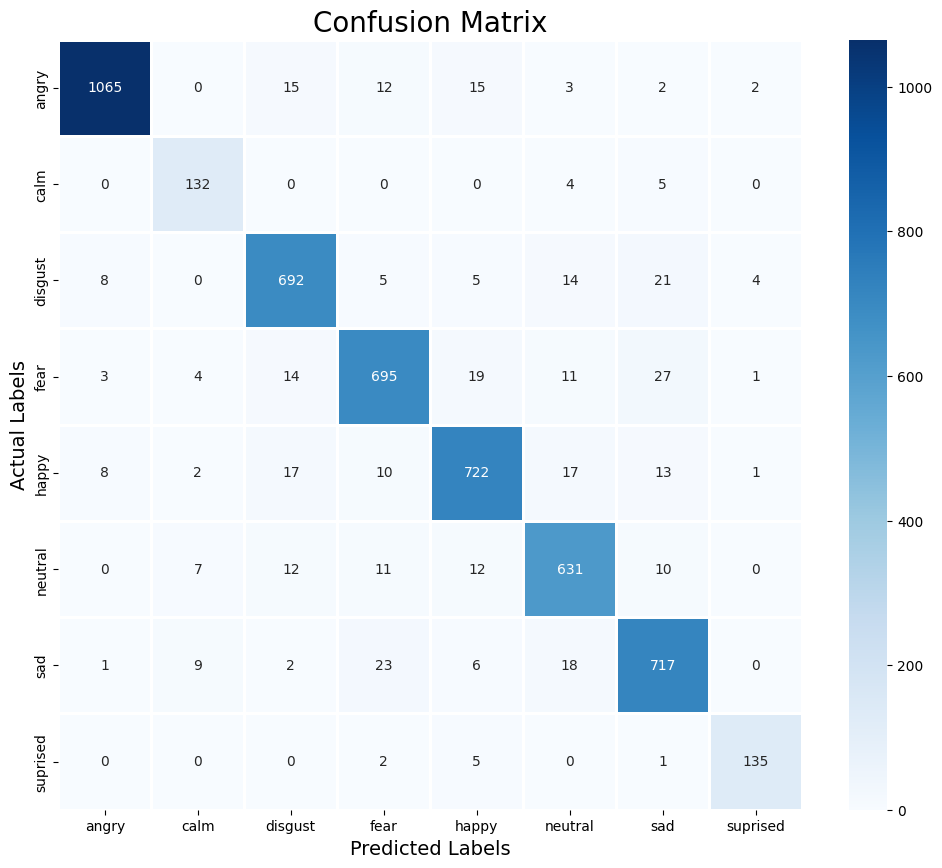

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.98      0.96      0.97      1114
        calm       0.86      0.94      0.89       141
     disgust       0.92      0.92      0.92       749
        fear       0.92      0.90      0.91       774
       happy       0.92      0.91      0.92       790
     neutral       0.90      0.92      0.91       683
         sad       0.90      0.92      0.91       776
    suprised       0.94      0.94      0.94       143

    accuracy                           0.93      5170
   macro avg       0.92      0.93      0.92      5170
weighted avg       0.93      0.93      0.93      5170



In [ ]:
## saving model
import os
from datetime import datetime
def save_model(model , suffix = None) :
  modeldir = os.path.join('/content/drive/MyDrive/SPEECH EMOTION REGCONITION',datetime.now().strftime('%Y%m%d-%H%M%S'))
  modelpath = modeldir + '-' + suffix + '.h5'
  print(f'saving model into {modelpath}')
  model.save(modelpath)
  return modelpath

In [ ]:
save_model(my_model,suffix = 'speech_emotion_recognition_model')

saving model into /content/drive/MyDrive/SPEECH EMOTION REGCONITION/20231023-131929-speech_emotion_recognition_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/SPEECH EMOTION REGCONITION/20231023-131929-speech_emotion_recognition_model.h5'

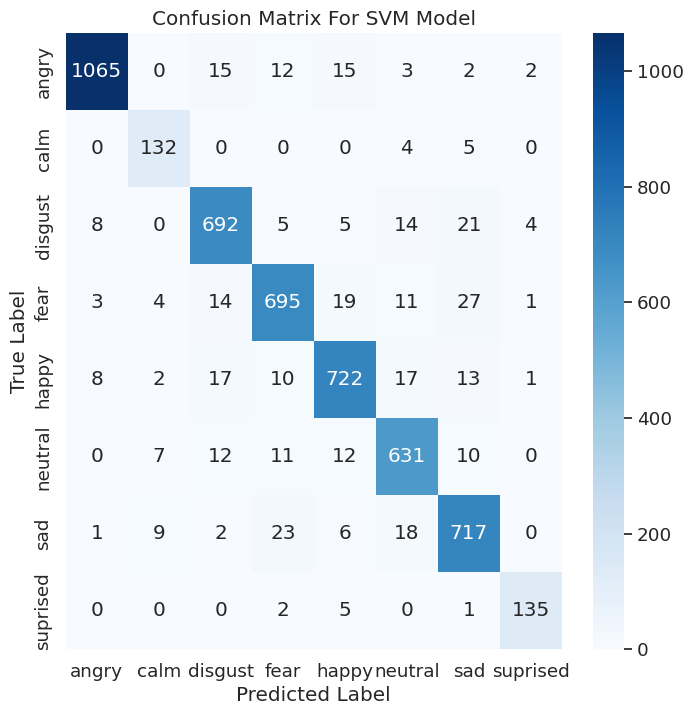

In [ ]:
#Visualize Confusion Matrix For SVM model
result_cf = confusion_matrix (y_test,y_pred)
sns.set (font_scale=1.2)
plt.figure(figsize=(8,8))
label_name = np.unique(y_test)
sns.heatmap (result_cf,annot=True,cmap='Blues',fmt='g',xticklabels=label_name, yticklabels=label_name)
sns.set (font_scale=1.2)

plt.title ('Confusion Matrix For SVM Model')
plt.xlabel ('Predicted Label')
plt.ylabel ('True Label')
plt.show ()

In [40]:
from sklearn.metrics import classification_report

# After making predictions, print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1204
           1       0.76      0.66      0.71       143
           2       0.77      0.74      0.76       733
           3       0.79      0.80      0.79       781
           4       0.75      0.79      0.77       734
           5       0.84      0.82      0.83       644
           6       0.82      0.78      0.80       799
           7       0.62      0.72      0.67       132

   micro avg       0.81      0.81      0.81      5170
   macro avg       0.78      0.78      0.78      5170
weighted avg       0.81      0.81      0.81      5170
 samples avg       0.81      0.81      0.81      5170



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.feature_extraction import FeatureExtractor

# Load dataset, where X contains audio features and y contains emotion labels
# replace this with your actual data loading code.
#X, y = load_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print ( "Accuracy:", (accuracy*100))

Accuracy: 89.69052224371373
